## Features reduction

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

df = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_train.xls")

df_full = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")
df_min = df_full.min()
df_max = df_full.max()

#Drop 'protected' features
drop_cols = ['prop', 'other_prop', 'other_resp']
df = df[[col for col in df if col not in drop_cols]]

df.head()

,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,43000,26,60,31000,20,4.2,3.0,2.8,50
1,12000,7,20,38000,20,1.9,4.4,2.9,50
2,88000,50,20,69000,12,3.3,3.8,3.4,80
3,24000,50,60,26000,14,3.6,3.8,2.6,50
4,137000,24,60,43000,4,3.6,2.5,2.7,100


## Individual plots

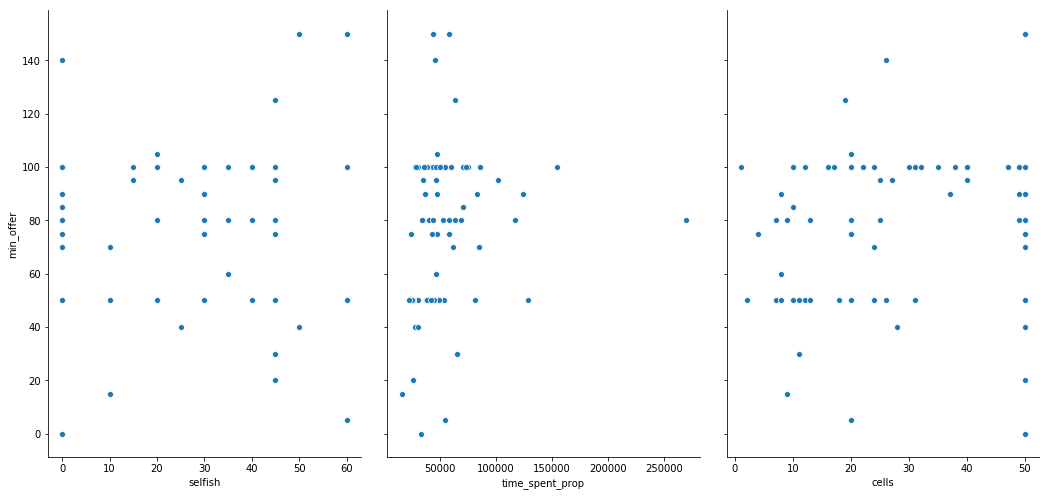

In [2]:
# sb.pairplot(df, x_vars=('prop','other_resp','other_prop'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')
# sb.pairplot(df, x_vars=('cells', 'selfish','count_effort'), y_vars='min_offer', height=7, aspect=0.7)
# sb.pairplot(df, x_vars=('Honesty_Humility', 'Extraversion','Agreeableness'), y_vars='min_offer', height=7, aspect=0.7)

sb.pairplot(df, x_vars=('selfish', 'time_spent_prop', 'cells'), y_vars='min_offer', height=7, aspect=0.7)

## Train model with top features

In [3]:
from utils.preprocessing import df_to_xy
top_columns = ['selfish', 'time_spent_prop']
#top_columns = ['cells', 'time_spent_prop']
x, y = df_to_xy(df, centered=True, select_columns=top_columns, min_target=5, max_target=190)
split = int(x.shape[0] * 0.6)
xTrain, yTrain = x[:split], y[:split]
xTest, yTest = x[split:], y[split:]

In [4]:
from sklearn.svm import SVR
from models import AcceptanceModel
model = AcceptanceModel(SVR(gamma='auto'))
model.fit(xTrain, yTrain)

Using TensorFlow backend.


In [5]:
from models.metrics import gain_mean, avg_loss_ratio
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))
pd.DataFrame(data={"Mean gain: ": [gain_mean(yTest, yPred)], "AVG loss ratio: ": [avg_loss_ratio(yTest, yPred)]})

Mean gain:  97.03125
AVG loss ratio:  0.1711503782542585


,AVG loss ratio:,Mean gain:
0,0.17115,97.03125


In [6]:
print("Unique predicted values: ", np.unique(yPred))

Unique predicted values:  [ 90.  95. 100. 105. 110.]


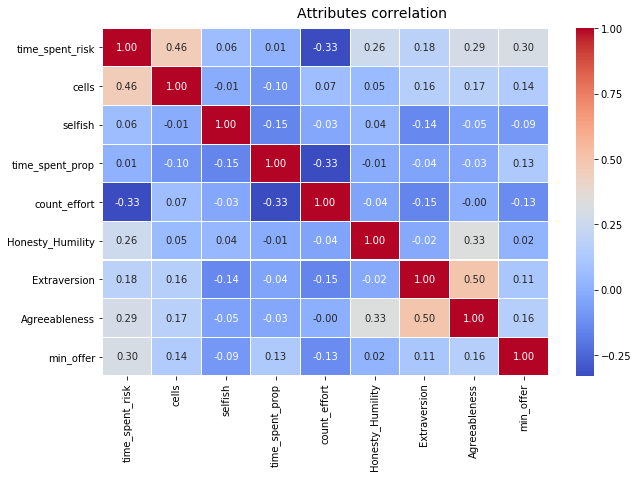

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes correlation', fontsize=14)

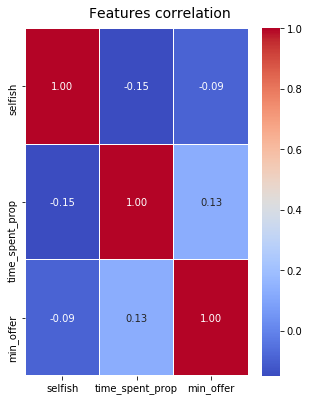

In [8]:
from utils.preprocessing import df_to_xydf
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(5, 6))
df_x, df_y = df_to_xydf(df, select_columns=top_columns, df_min=df_min, df_max=df_max)
df_corr = df_x.copy()
df_corr['min_offer'] = df_y['min_offer']
corr = df_corr.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation', fontsize=14)

**Validation DATA**

In [17]:
lbl1, lbl2 = top_columns
x1 = xTest[:, 0].ravel()
x2 = xTest[:, 1].ravel()

offer = model.predict(xTest)
print(top_columns)
print(out_df_real.columns)
#f, ax = plt.subplots(figsize=(10, 8))
out_df_real = pd.DataFrame({lbl1: x1, lbl2: x2, 'min_offer': yTest.ravel()})
#out_df_real.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

# f2, ax2 = plt.subplot(figsize=(10, 8))
# out_df_real = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
# out_df_real.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis', ax=ax)

out_df_real

['selfish', 'time_spent_prop']
Index(['min_offer', 'selfish', 'time_spent_prop'], dtype='object')


,min_offer,selfish,time_spent_prop
0,50,-0.286920,-0.034522
1,80,-0.453586,0.012908
2,50,0.546414,-0.022665
3,40,0.379747,-0.093811
4,100,0.046414,-0.018712
5,95,0.296414,-0.030570
6,75,0.296414,-0.046380
7,50,0.546414,-0.038475
8,95,-0.036920,0.186821
9,100,0.129747,-0.030570


In [ ]:

x1 = xTest[:, 0].ravel()
x2 = xTest[:, 1].ravel()

offer = model.predict(xTest)

out_df_real = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer*': offer})
out_df_real.plot.scatter(x=lbl1, y=lbl2, c='offer*', colormap='viridis')

## Generate data for the survey

In [ ]:
# Read and sanitize the data
df_test = pd.read_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test.xls")

#TODO: add 'prop' to drop_cols?
drop_cols = ['prop', 'other_prop', 'other_resp']
df_test = df_test[[col for col in df_test if col not in drop_cols]]

df_features, df_y = df_to_xydf(df_test, centered=True, select_columns=top_columns, df_min=df_min, df_max=df_max)
predictions = model.predict(df_features.values).astype(int)

df_final = df_test[top_columns].copy()
#RESCALE FEATURES
df_final['pred_min_offer'] = predictions.ravel()
df_final['min_offer'] = df_y['min_offer']
df_final.head()

In [ ]:
## df_final.to_excel("../data/HH_SURVEY1/UG_HH_NEW_continuous_no200_test_PRED.xls", index=False)

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
model = AcceptanceModel()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-50, 50, 1):
    for t in range(-50, 50, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/50
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.neural_network import MLPRegressor
model = AcceptanceModel(MLPRegressor(max_iter=1000))
model.fit(xTrain, yTrain)
f = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-50, 50, 1):
    for t in range(-50, 50, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/50
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.svm import SVR
model = AcceptanceModel(SVR(gamma='auto', kernel='sigmoid', degree=3))
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-40, 40, 1):
    for t in range(-40, 40, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/40
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-40, 40, 1):
    for t in range(-40, 40, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/40
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-40, 40, 1):
    for t in range(-40, 40, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/40
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-40, 40, 1):
    for t in range(-40, 40, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/40
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from models.metrics import gain_mean, avg_loss_ratio
from sklearn.neural_network import MLPClassifier
model = MLPClassifier((32, 32, 32, 32, 32))
model.fit(xTrain, yTrain.ravel())
yPred = model.predict(xTest)
print("Mean gain: ", gain_mean(yTest, yPred))
print("AVG loss ratio: ", avg_loss_ratio(yTest, yPred))

lst = []
x1 = []
x2 = []

for s in range(-40, 40, 1):
    for t in range(-40, 40, 1):
        x1.append(s)
        x2.append(t)
        lst.append((s, t))
data = np.array(lst)/40
offer = model.predict(data)
lbl1, lbl2 = top_columns
x1 = np.array(x1) * (df_max[lbl1] - df_min[lbl1]) + df_min[lbl1]
x2 = np.array(x2) * (df_max[lbl2] - df_min[lbl2]) + df_min[lbl2]

out_df = pd.DataFrame({lbl1: x1, lbl2: x2, 'offer': offer})
out_df.plot.scatter(x=lbl1, y=lbl2, c='offer', colormap='viridis')

In [ ]:
from utils.benchmark import process_benchmark_cv

process_benchmark_cv(MLPClassifier(), x, y.ravel())